# Imports

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cleaning

In [5]:
# read "Dashboarding/crime_data_v1.csv"
crime_data = pd.read_csv("Dashboarding/crime_data_v1.csv")
# drop column 0
crime_data.drop(columns = ['Unnamed: 0'], inplace = True)
columns_to_drop = ['Crime Code', 'DR_No', 'Area', 'Reporting District No', 'Part 1-2', 'Premise Code', 'Crime Code 1', 'Status']
crime_data.drop(columns = columns_to_drop, inplace = True)
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican
1,2010-09-13,2010-09-12,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican
3,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,30,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other


In [14]:
crime_data['Crime Description'].value_counts()

BATTERY - SIMPLE ASSAULT                                   242238
VEHICLE - STOLEN                                           231004
BURGLARY FROM VEHICLE                                      203611
BURGLARY                                                   187638
THEFT PLAIN - PETTY ($950 & UNDER)                         183665
                                                            ...  
TILL TAP - ATTEMPT                                              4
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              4
TRAIN WRECKING                                                  2
DRUNK ROLL - ATTEMPT                                            1
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
Name: Crime Description, Length: 143, dtype: int64

In [12]:
# save "Dashboarding/crime_data_v2.csv"
crime_data.to_csv("Dashboarding/crime_data_v2.csv")

# Forecasting Data

In [64]:
# read "Dashboarding/crime_data_v2.csv"
crime_data = pd.read_csv("Dashboarding/crime_data_v2.csv")
# drop column 0
crime_data.drop(columns = ['Unnamed: 0'], inplace = True)
# show only those rows that have "Date Occurred" after 2023
# crime_data = crime_data[crime_data['Date Occurred'].str.contains('2023')]
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories,Time Occurred Smoothed,Date Occurred Inter,Day of the Week,num_day_of_week
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican,1300,2010-02-20,Saturday,5
1,2010-09-13,2010-09-12,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White,30,2010-09-12,Sunday,6
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican,1530,2010-08-09,Monday,0
3,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White,300,2010-01-05,Tuesday,1
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican,2030,2010-01-02,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,30,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White,30,2023-01-01,Sunday,6
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican,1800,2023-02-02,Thursday,3
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White,1300,2023-01-12,Thursday,3
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other,1030,2023-01-08,Sunday,6


In [11]:
# create a dictionary of average 'Latitude' and 'Longitude'	 grouped by 'Area Name'
area_dict = crime_data.groupby('Area Name').mean()[['Latitude', 'Longitude']].to_dict()
area_dict

{'Latitude': {'77th Street': 33.977810262345685,
  'Central': 34.0476316585957,
  'Devonshire': 34.24879045020461,
  'Foothill': 34.24765542521995,
  'Harbor': 33.76823713592232,
  'Hollenbeck': 34.05599030226698,
  'Hollywood': 34.09889387129741,
  'Mission': 34.251464942528784,
  'N Hollywood': 34.17284167528441,
  'Newton': 34.00828348134985,
  'Northeast': 34.10742617021282,
  'Olympic': 34.06007182203397,
  'Pacific': 33.98488593073597,
  'Rampart': 34.063768914647014,
  'Southeast': 33.93923831699345,
  'Southwest': 34.02006445182724,
  'Topanga': 34.19132017766489,
  'Van Nuys': 34.178924468085064,
  'West LA': 34.052542380422665,
  'West Valley': 34.186756035437405,
  'Wilshire': 34.06177579787238},
 'Longitude': {'77th Street': -118.29681990740771,
  'Central': -118.25047227602853,
  'Devonshire': -118.5402841746248,
  'Foothill': -118.38096876832842,
  'Harbor': -118.28732354368944,
  'Hollenbeck': -118.20276914357684,
  'Hollywood': -118.3281724208376,
  'Mission': -118.4515

Merging crime_data and forecast_data

In [74]:
forecast_crime_merge_pre_step = crime_data[['Date Occurred', 'Area Name']].copy()
# round Date Occurred to the nearest week
forecast_crime_merge_pre_step['Date Occurred'] = pd.to_datetime(forecast_crime_merge_pre_step['Date Occurred']).dt.round('7D')
# subtract all dates by 2
forecast_crime_merge_pre_step['Date Occurred'] = forecast_crime_merge_pre_step['Date Occurred'] - pd.DateOffset(days = 2)
# groupby 'Date Occurred' and 'Area Name' and give sum
forecast_crime_merge_pre_step = forecast_crime_merge_pre_step.groupby(['Date Occurred', 'Area Name']).size().reset_index(name = 'Number of Crimes')
forecast_crime_merge_pre_step['Latitude'] = forecast_crime_merge_pre_step['Area Name'].map(area_dict['Latitude'])
forecast_crime_merge_pre_step['Longitude'] = forecast_crime_merge_pre_step['Area Name'].map(area_dict['Longitude'])
# drop rows where 'Date Occurred' is 2023-02-07
forecast_crime_merge_pre_step = forecast_crime_merge_pre_step[forecast_crime_merge_pre_step['Date Occurred'] != '2023-02-07']
forecast_crime_merge_pre_step['Type'] = 'Data'
# rename Date Occurred to Date
forecast_crime_merge_pre_step.rename(columns = {'Date Occurred': 'Date'}, inplace = True)
forecast_crime_merge_pre_step

,Date,Area Name,Number of Crimes,Latitude,Longitude,Type
0,2009-12-29,77th Street,224,33.977810,-118.296820,Data
1,2009-12-29,Central,99,34.047632,-118.250472,Data
2,2009-12-29,Devonshire,147,34.248790,-118.540284,Data
3,2009-12-29,Foothill,216,34.247655,-118.380969,Data
4,2009-12-29,Harbor,144,33.768237,-118.287324,Data
...,...,...,...,...,...,...
14359,2023-01-31,Topanga,166,34.191320,-118.601824,Data
14360,2023-01-31,Van Nuys,172,34.178924,-118.446767,Data
14361,2023-01-31,West LA,181,34.052542,-118.437783,Data
14362,2023-01-31,West Valley,166,34.186756,-118.520346,Data


In [75]:
# read "LA_area_date_forecast.csv"
forecast_data = pd.read_csv("Dashboarding/LA_area_date_forecast.csv")
forecast_data['Number of Crimes'] = forecast_data['Predicted Crimes'] * forecast_data['Percentage of Year Crimes']
# convert 'Number of Crimes' to int
forecast_data['Number of Crimes'] = forecast_data['Number of Crimes'].astype(int)
forecast_data = forecast_data[['Date', 'AREA NAME', 'Number of Crimes']]
# rename AREA NAME to Area Name
forecast_data.rename(columns = {'AREA NAME': 'Area Name'}, inplace = True)
# create a new column 'Latitude' and 'Longitude' using area_dict
forecast_data['Latitude'] = forecast_data['Area Name'].map(area_dict['Latitude'])
forecast_data['Longitude'] = forecast_data['Area Name'].map(area_dict['Longitude'])
forecast_data['Type'] = 'Forecast'

# merge forecast_crime_merge_pre_step and forecast_data
forecast_data = pd.concat([forecast_crime_merge_pre_step, forecast_data], ignore_index = True)
# Convert date to year month day
forecast_data['Date'] = pd.to_datetime(forecast_data['Date']).dt.strftime('%Y-%m-%d')

# save forecast_data
forecast_data.to_csv("Dashboarding/forecast_data.csv", index = False)
forecast_data

,Date,Area Name,Number of Crimes,Latitude,Longitude,Type
0,2009-12-29,77th Street,224,33.977810,-118.296820,Data
1,2009-12-29,Central,99,34.047632,-118.250472,Data
2,2009-12-29,Devonshire,147,34.248790,-118.540284,Data
3,2009-12-29,Foothill,216,34.247655,-118.380969,Data
4,2009-12-29,Harbor,144,33.768237,-118.287324,Data
...,...,...,...,...,...,...
14401,2023-02-14,Topanga,170,34.191320,-118.601824,Forecast
14402,2023-02-14,Van Nuys,175,34.178924,-118.446767,Forecast
14403,2023-02-14,West LA,165,34.052542,-118.437783,Forecast
14404,2023-02-14,West Valley,162,34.186756,-118.520346,Forecast


In [77]:
# show rows with Date = 2023-02-07	
temp = forecast_data[forecast_data['Date'] == '2023-01-31'].copy()
temp['Type'] = 'Forecast'
# add temp to forecast_data
forecast_data = pd.concat([forecast_data, temp], ignore_index = True)
temp

,Date,Area Name,Number of Crimes,Latitude,Longitude,Type
14343,2023-01-31,77th Street,321,33.977810,-118.296820,Forecast
14344,2023-01-31,Central,279,34.047632,-118.250472,Forecast
14345,2023-01-31,Devonshire,98,34.248790,-118.540284,Forecast
14346,2023-01-31,Foothill,151,34.247655,-118.380969,Forecast
14347,2023-01-31,Harbor,153,33.768237,-118.287324,Forecast
14348,2023-01-31,Hollenbeck,146,34.055990,-118.202769,Forecast
14349,2023-01-31,Hollywood,168,34.098894,-118.328172,Forecast
14350,2023-01-31,Mission,210,34.251465,-118.451572,Forecast
14351,2023-01-31,N Hollywood,191,34.172842,-118.385995,Forecast
14352,2023-01-31,Newton,214,34.008283,-118.260771,Forecast


In [78]:
forecast_data.to_csv("Dashboarding/forecast_data_v2.csv", index = False)

Merging crime_data and crime_preds

In [67]:
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories,Time Occurred Smoothed,Date Occurred Inter,Day of the Week,num_day_of_week
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican,1300,2010-02-20,Saturday,5
1,2010-09-13,2010-09-12,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White,30,2010-09-12,Sunday,6
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican,1530,2010-08-09,Monday,0
3,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White,300,2010-01-05,Tuesday,1
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican,2030,2010-01-02,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,30,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White,30,2023-01-01,Sunday,6
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican,1800,2023-02-02,Thursday,3
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White,1300,2023-01-12,Thursday,3
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other,1030,2023-01-08,Sunday,6


In [68]:
# read "LA_crime_preds.csv"
crime_preds = pd.read_csv("Dashboarding/LA_crime_preds.csv")
# Drop 'Dummy Column', 'Year', 'Month'
crime_preds.drop(columns = ['Dummy Column', 'Year', 'Month'], inplace = True)
crime_preds['Crime Location'] = crime_preds['Crime Location'].str.title()
# save crime_preds
crime_preds.to_csv("Dashboarding/crime_preds_v2.csv", index = False)
crime_preds

,Date,Day Number,Crime Location,Crime Categories,Predicted Crimes
0,2023-02-07,Weekday,Alley,Assault,1.858675
1,2023-02-07,Weekday,Alley,Assault with Weapon,1.858675
2,2023-02-07,Weekday,Alley,Burglary,1.858675
3,2023-02-07,Weekday,Alley,Domestic Violence,1.858675
4,2023-02-07,Weekday,Alley,Identity Theft,1.858675
...,...,...,...,...,...
1799,2023-02-14,Weekend,Yard (Residential/Business),Sexual Misconduct,1.858675
1800,2023-02-14,Weekend,Yard (Residential/Business),Theft,3.408291
1801,2023-02-14,Weekend,Yard (Residential/Business),Threats,1.858675
1802,2023-02-14,Weekend,Yard (Residential/Business),Vandalism,1.858675


In [18]:
# groupby Crime Location and find mean of 'Predicted Crimes'
crime_preds.groupby('Crime Location').sum()['Predicted Crimes']

Crime Location
ALLEY                                                 87.980158
BANK                                                  87.980158
BUS STOP                                              87.980158
CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)      87.980158
CLOTHING STORE                                        87.980158
CONDOMINIUM/TOWNHOUSE                                 87.980158
DEPARTMENT STORE                                      87.980158
DRIVEWAY                                             218.035702
DRUG STORE                                            87.980158
ELEMENTARY SCHOOL                                     87.980158
GARAGE/CARPORT                                       224.520039
GAS STATION                                           87.980158
HEALTH SPA/GYM                                        87.980158
HIGH SCHOOL                                           87.980158
HOSPITAL                                              87.980158
HOTEL                    

In [17]:
# groupby Crime Location and find mean of 'Crime Categories'
crime_preds.groupby('Crime Categories').sum()['Predicted Crimes']

Crime Categories
Assault                 663.205239
Assault with Weapon     712.386562
Burglary                916.005125
Domestic Violence       699.495053
Identity Theft          542.891002
Robbery                 501.018655
Sexual Misconduct       464.406574
Theft                  1218.028529
Threats                 449.440334
Vandalism               861.874484
Vehicle Theft           634.540429
Name: Predicted Crimes, dtype: float64

In [21]:
# groupby Crime Location and find mean of 'Crime Categories'
crime_preds.groupby('Day Number').sum()['Predicted Crimes']

Day Number
Weekday    3925.418305
Weekend    3737.873680
Name: Predicted Crimes, dtype: float64

In [79]:
crime_preds.groupby('Date').sum()['Predicted Crimes']

Date
2023-02-07    3831.645993
2023-02-14    3831.645993
Name: Predicted Crimes, dtype: float64

# Further Cleaning

In [91]:
# read "Dashboarding/crime_data_v2.csv"
crime_data = pd.read_csv("Dashboarding/crime_data_v2.csv")
crime_data.drop(columns = ['Unnamed: 0'], inplace = True)
crime_data


,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories,Time Occurred Smoothed,Date Occurred Inter,Day of the Week,num_day_of_week
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican,13:00,2010-02-20,Saturday,5
1,2010-09-13,2010-09-12,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White,03:00,2010-09-12,Sunday,6
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican,15:30,2010-08-09,Monday,0
3,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White,03:00,2010-01-05,Tuesday,1
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican,20:30,2010-01-02,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,30,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White,03:00,2023-01-01,Sunday,6
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican,18:00,2023-02-02,Thursday,3
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White,13:00,2023-01-12,Thursday,3
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other,10:30,2023-01-08,Sunday,6


In [92]:
crime_data['Time Occurred'] = crime_data['Time Occurred'].astype(str).str.zfill(4)
crime_data['Time Occurred']

0          1350
1          0045
2          1515
3          0150
4          2100
           ... 
2774859    0030
2774860    1830
2774861    1240
2774862    1030
2774863    1800
Name: Time Occurred, Length: 2774864, dtype: object

In [97]:
# round the time to the nearest hour
crime_data['Time Occurred Smoothed'] = pd.to_datetime(crime_data['Time Occurred'], format='%H%M').dt.round('2H15min').dt.strftime('%H%M')

<AxesSubplot:>

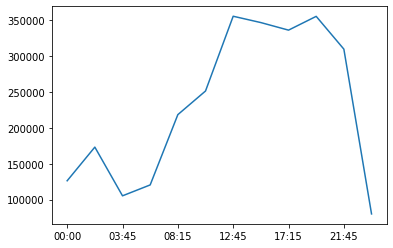

In [102]:
# sort crime_data['Time Occurred'].value_counts() from index and line plot
crime_data['Time Occurred Smoothed'].value_counts().sort_index().plot()



In [99]:
# add day of the week column using Date Occurred
crime_data['Date Occurred Inter'] = pd.to_datetime(crime_data['Date Occurred'], format='%Y-%m-%d')
crime_data['Day of the Week'] = crime_data['Date Occurred Inter'].dt.day_name()
# add a column num_day_of_week which has the number of the day of the week
crime_data['num_day_of_week'] = crime_data['Date Occurred Inter'].dt.dayofweek
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories,Time Occurred Smoothed,Date Occurred Inter,Day of the Week,num_day_of_week
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican,1245,2010-02-20,Saturday,5
1,2010-09-13,2010-09-12,0045,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White,0130,2010-09-12,Sunday,6
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican,1500,2010-08-09,Monday,0
3,2010-01-05,2010-01-05,0150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White,0130,2010-01-05,Tuesday,1
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican,2145,2010-01-02,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,0030,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White,0130,2023-01-01,Sunday,6
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican,1930,2023-02-02,Thursday,3
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White,1245,2023-01-12,Thursday,3
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other,1030,2023-01-08,Sunday,6


In [103]:
crime_data.to_csv("Dashboarding/crime_data_v2.csv")

# Time 

In [82]:
crime_data = pd.read_csv("Dashboarding/crime_data_v2.csv")
crime_data.drop(columns = ['Unnamed: 0'], inplace = True)
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories,Time Occurred Smoothed,Date Occurred Inter,Day of the Week,num_day_of_week
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican,1300,2010-02-20,Saturday,5
1,2010-09-13,2010-09-12,45,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White,30,2010-09-12,Sunday,6
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican,1530,2010-08-09,Monday,0
3,2010-01-05,2010-01-05,150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White,300,2010-01-05,Tuesday,1
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican,2030,2010-01-02,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,30,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White,30,2023-01-01,Sunday,6
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican,1800,2023-02-02,Thursday,3
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White,1300,2023-01-12,Thursday,3
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other,1030,2023-01-08,Sunday,6


In [100]:
# convert crime_data['Time Occurred Smoothed'] to 24 hour time format
crime_data['Time Occurred Smoothed'] = pd.to_datetime(crime_data['Time Occurred Smoothed'], format='%H%M').dt.strftime('%H:%M')
crime_data

,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Location,Latitude,Longitude,Crime Categories,Descent Categories,Time Occurred Smoothed,Date Occurred Inter,Day of the Week,num_day_of_week
0,2010-02-20,2010-02-20,1350,Newton,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Violation of court order,Hispanic/Latin/Mexican,12:45,2010-02-20,Saturday,5
1,2010-09-13,2010-09-12,0045,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Vandalism,White,01:30,2010-09-12,Sunday,6
2,2010-08-09,2010-08-09,1515,Newton,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Other,Hispanic/Latin/Mexican,15:00,2010-08-09,Monday,0
3,2010-01-05,2010-01-05,0150,Hollywood,VIOLATION OF COURT ORDER,47,F,W,STREET,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Violation of court order,White,01:30,2010-01-05,Tuesday,1
4,2010-01-03,2010-01-02,2100,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,Invest Cont,8TH ST,34.0387,-118.2488,Sexual Misconduct,Hispanic/Latin/Mexican,21:45,2010-01-02,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774859,2023-01-01,2023-01-01,0030,Central,BATTERY - SIMPLE ASSAULT,35,M,W,LA UNION STATION (NOT LINE SPECIFIC),Invest Cont,800 N ALAMEDA ST,34.0561,-118.2375,Assault,White,01:30,2023-01-01,Sunday,6
2774860,2023-02-05,2023-02-02,1830,Hollenbeck,INTIMATE PARTNER - AGGRAVATED ASSAULT,41,F,H,OTHER RESIDENCE,Invest Cont,3000 BUDAU AV,34.0808,-118.1738,Domestic Violence,Hispanic/Latin/Mexican,19:30,2023-02-02,Thursday,3
2774861,2023-01-12,2023-01-12,1240,Northeast,THEFT PLAIN - PETTY ($950 & UNDER),42,M,W,STREET,Invest Cont,1000 MILWAUKEE AV,34.1214,-118.1915,Theft,White,12:45,2023-01-12,Thursday,3
2774862,2023-01-08,2023-01-08,1030,West LA,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",48,M,O,HEALTH SPA/GYM,Invest Cont,10200 SANTA MONICA BL,34.0611,-118.4184,Theft,Other,10:30,2023-01-08,Sunday,6


In [101]:
crime_data['Time Occurred Smoothed'].value_counts()

12:45    354898
19:30    354742
15:00    346090
17:15    335593
21:45    309189
10:30    250987
08:15    218153
01:30    173016
00:00    126239
06:00    120467
03:45    105319
23:15     80171
Name: Time Occurred Smoothed, dtype: int64

In [85]:
crime_data.to_csv("Dashboarding/crime_data_v2.csv")